# Hessian of VAE (Input layer)

https://qiita.com/shiita0903/items/b41cb370dd9aab5e382c

In [1]:
import numpy as np
import tensorflow as tf

import keras
import keras.backend as K

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
model = keras.models.load_model('trained_model/trained_vae.h5', compile=False)

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           2570        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 10)           2570        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

In [4]:
(x_train, y_train_), (x_test, y_test_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
x_hat = model.predict(x_train[0].reshape(1, -1))
x_hat.shape

(1, 784)

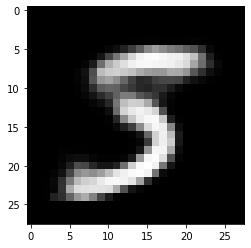

In [7]:
plt.imshow(x_hat.reshape(28,28), "gray")
plt.show()

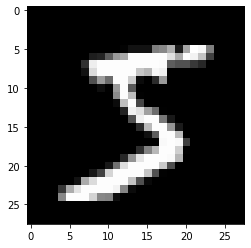

In [8]:
plt.imshow(x_train[0].reshape(28,28), "gray")
plt.show()

In [9]:
x_true = K.placeholder((None, 784,))

# loss = K.variable()
loss = tf.keras.losses.MSE(x_true, model.output)

In [10]:
input_layer = model.layers[0].output

In [11]:
hessian = tf.hessians(loss, input_layer)[0]

In [17]:
x = x_train[1].reshape(1, -1)
# x = x_train[:10]


tf_session = K.get_session()
hessian_matrix = hessian.eval({model.input: x, x_true: x}, session=tf_session)

In [18]:
hessian_matrix = np.squeeze(hessian_matrix)
hessian_matrix.shape

(784, 784)

In [19]:
hessian_matrix

array([[ 3.1443557e-05,  6.5904310e-06,  5.2999694e-06, ...,
         1.0865757e-05,  2.0054836e-06,  9.6156327e-07],
       [ 6.5904278e-06,  1.6764863e-05, -7.5473085e-06, ...,
         4.8010443e-06, -4.6743762e-06,  3.1360746e-06],
       [ 5.2999676e-06, -7.5473108e-06,  4.0997635e-05, ...,
        -8.3196628e-06,  2.7779239e-05, -2.1950465e-05],
       ...,
       [ 1.0865762e-05,  4.8010461e-06, -8.3196683e-06, ...,
         1.8814260e-05,  2.1365768e-06,  8.6234850e-06],
       [ 2.0054840e-06, -4.6743767e-06,  2.7779242e-05, ...,
         2.1365777e-06,  4.9358285e-05, -6.8872428e-06],
       [ 9.6156782e-07,  3.1360764e-06, -2.1950465e-05, ...,
         8.6234813e-06, -6.8872405e-06,  2.2852480e-05]], dtype=float32)

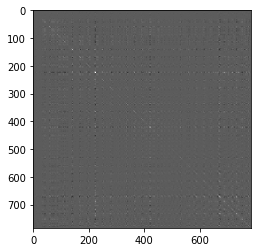

In [20]:
plt.imshow(hessian_matrix, "gray")
plt.show()

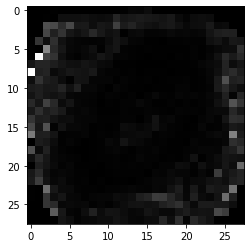

In [21]:
plt.imshow(np.diag(hessian_matrix).reshape(28,28), "gray")
plt.show()

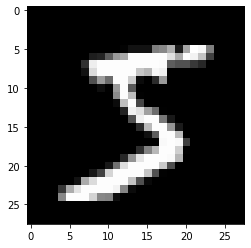

In [22]:
plt.imshow(x_train[0].reshape(28,28), "gray")
plt.show()

In [23]:
eig_values, eig_vectors = np.linalg.eig(hessian_matrix)

for i in range(len(eig_vectors)):
    eig_vectors[i] = eig_vectors[i] / np.linalg.norm(eig_vectors[i])
    
eig_values = eig_values.astype(np.float32)
eig_vectors = eig_vectors.astype(np.float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [24]:
max(eig_values)

0.11923592

0.039250623


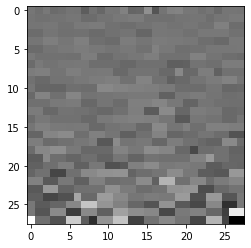

In [25]:
idx = 5
print(eig_values[idx])
plt.imshow(eig_vectors[idx].reshape(28,28), "gray")
plt.show()

0.11923592


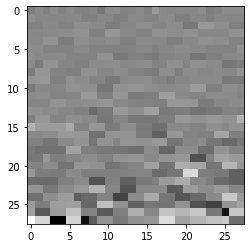

In [26]:
idx = 0
print(eig_values[idx])
plt.imshow(eig_vectors[idx].reshape(28,28), "gray")
plt.show()

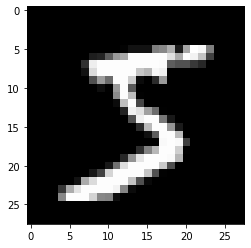

In [49]:
plt.imshow(x_train[0].reshape(28,28), "gray")
plt.show()

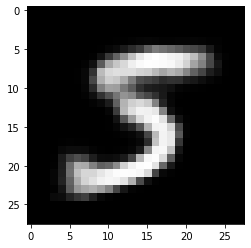

In [50]:
x_hat = model.predict(x_train[0].reshape(1, -1))

plt.imshow(x_hat.reshape(28,28), "gray")
plt.show()

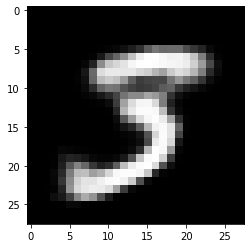

In [51]:
x_dummy = x_train[0] + eig_vectors[0]
x_dummy_hat = model.predict(x_dummy.reshape(1, -1))

plt.imshow(x_dummy_hat.reshape(28,28), "gray")
plt.show()

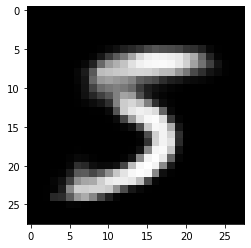

In [52]:
x_dummy = x_train[0] + np.eye(784)[20]
x_dummy_hat = model.predict(x_dummy.reshape(1, -1))

plt.imshow(x_dummy_hat.reshape(28,28), "gray")
plt.show()

# ge


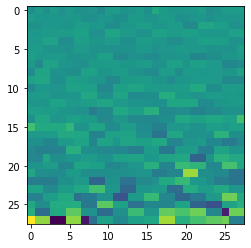

In [53]:
plt.imshow(eig_vectors[0].reshape(28,28))